### Fase 1: Exploración y Limpieza
- Exploración Inicial:
    - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#DF con información de vuelos anuales efectuados por cada cliente distribuido en meses
df_flight=pd.read_csv('Customer Flight Activity.csv')
df_flight.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [3]:
df_flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [4]:
df_flight.shape

(405624, 10)

In [5]:
df_flight.isna().sum()/df_flight.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [6]:
df_flight.duplicated().sum()

1864

In [7]:
#Elimino los duplicados
df_flight.drop_duplicates(inplace=True)


In [8]:
df_flight.duplicated().sum()

0

In [9]:
#Compruebo el tamaño del df una vez eliminados los duplicados
df_flight.shape

(403760, 10)

In [10]:
#DF con los datos del cliente: 

df_loyalty=pd.read_csv('Customer Loyalty History.csv')
df_loyalty.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [11]:
df_loyalty.shape

(16737, 16)

In [12]:
df_loyalty.isna().sum()/df_loyalty.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [13]:
df_loyalty.duplicated().sum()

0

In [14]:
#UNION DE DATAFRAMES
#Hago un mergeado por la derecha porque un mismo cliente puede haber hecho varios viajes a lo largo del año 
# y así aseguro que preservo todos los datos del histórico de vuelos ('Customer Flight Activity)
df_final=df_loyalty.merge(df_flight, on =["Loyalty Number"], how = "right")
df_final.sample(6)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
204402,242789,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Married,Nova,3962.83,Standard,2013,10,NaN,NaN,2018,1,0,0,0,0,0.0,0,0
379788,618112,Canada,British Columbia,Vancouver,V6E 3D9,Female,College,NaN,Single,Nova,10244.24,Standard,2015,4,NaN,NaN,2018,11,1,0,1,949,94.0,0,0
398879,368073,Canada,Quebec,Montreal,H2Y 4R4,Female,Doctor,166533.0,Married,Nova,3336.22,Standard,2017,3,NaN,NaN,2017,11,8,2,10,660,66.0,376,31
104986,323660,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,76947.0,Married,Star,37111.66,2018 Promotion,2018,2,NaN,NaN,2017,7,0,0,0,0,0.0,0,0
189260,332003,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,89586.0,Divorced,Star,6156.36,Standard,2014,3,2014.0,11.0,2017,12,0,0,0,0,0.0,0,0
160483,590778,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,78300.0,Married,Star,27643.24,Standard,2017,7,NaN,NaN,2017,10,4,0,4,3040,304.0,0,0


In [15]:
df_final.shape

(403760, 25)

In [16]:
#Comienzo la exploración de tipos de datos una vez unido el DF, me parece más cómodo que hacerlo dos veces, una vez para cada tabla. 

#Empiezo por las columnas numéricas y sus estadísticos más comunes. 
#¡¡¡¡¡¡¡¡¡OJO!!!!!! Hay un valor negativo en la columna Salary.
#

df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


In [17]:
df_final.describe(include='O').T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [18]:
#Echamos un vistazo a los valores únicos de las categóricas y sus frecuencias para ver si hay algún valor raro.
df_cat = df_final.select_dtypes(include = "object")
for columna in df_cat.columns:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_cat[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_cat[columna].value_counts()} ")

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    403760
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'CITY' -----------

Sus valores únicos son: ['Edmont

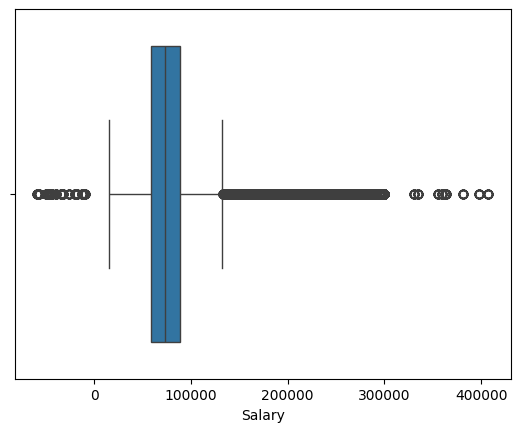

In [19]:
sns.boxplot(x = "Salary", data = df_final);

In [20]:
df_final.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [21]:
df_final.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0


In [22]:
#DATOS QUE HAY QUE CAMBIAR: 
#Dollar Cost Points Redeemed cambiar a float64 (es moneda), Distance tambien a float64 

In [23]:
#Pasamos los datos que están en int a float. Creamos la función y aplicamos sobre las columnas

def cambio_float(columna):
    try:
        return float(columna)
    except: 
        return np.nan
    
columnas_int=['Dollar Cost Points Redeemed', 'Distance']
for columna in columnas_int:
    df_final[columna]=df_final[columna].apply(cambio_float)

In [24]:
df_final[columnas_int].dtypes

Dollar Cost Points Redeemed    float64
Distance                       float64
dtype: object

In [25]:
#GESTIÓN DE NULOS
#Miramos los % de nulos por columna: 
df_final.isnull().sum() / df_final.shape[0] * 100



Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Poin

In [26]:
df_final['Cancellation Year'].value_counts()

Cancellation Year
2018.0    15519
2017.0    12147
2016.0    10248
2015.0     6360
2014.0     4344
2013.0     1032
Name: count, dtype: int64

In [27]:
df_final.sort_values(by=["Cancellation Year"]).head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
82886,939593,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Aurora,6624.61,Standard,2013,9,2013.0,9.0,2017,5,0,0,0,0.0,0.0,0,0.0
257174,366576,Canada,British Columbia,Vancouver,V6E 3D9,Female,College,NaN,Single,Nova,5293.72,Standard,2013,6,2013.0,12.0,2018,4,0,0,0,0.0,0.0,0,0.0
206395,348299,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,NaN,Single,Star,4827.78,Standard,2013,8,2013.0,11.0,2018,1,0,0,0,0.0,0.0,0,0.0
281582,766909,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,67721.0,Married,Nova,7851.58,Standard,2013,1,2013.0,8.0,2018,5,0,0,0,0.0,0.0,0,0.0
281604,767774,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2013,1,2013.0,9.0,2018,5,0,0,0,0.0,0.0,0,0.0


In [28]:
#Vamos a borrar las filas de los clientes que ya no tienen tarjeta de fidelización porque no nos aportan información. 
#Los clientes que ya no tienen tarjeta de fidelización son aquellos que en las columnas Cancellation Year y Cancellation Month tienen valores menores que en las columnas Year y Month
#que son columnas que muestran los años y meses respectivamente en los que han volado
#Filtramos las filas con .index: 
filas_borrar=df_final[(df_final["Cancellation Year"] < df_final["Year"]) | ((df_final["Cancellation Year"] == df_final["Year"]) & (df_final["Cancellation Month"] < df_final["Month"]))].index
filas_borrar

Index([    64,     67,     91,    102,    105,    125,    190,    194,    196,
          198,
       ...
       403722, 403723, 403727, 403739, 403741, 403743, 403744, 403751, 403753,
       403754],
      dtype='int64', length=33988)

In [29]:
#Borramos las filas

df_final.drop(filas_borrar, axis=0, inplace=True)

In [30]:
df_final.shape

(369772, 25)

In [31]:
# Importo las librerías para la imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


In [32]:
#Eliminamos los valores negativos usando la función abs() de pandas que pasa a valores absolutos todos los de la columna ya que hemos comprobado en la gráfica que no son valores muy extremos.
df_final['Salary']=df_final['Salary'].abs()

In [33]:
#Compruebo que no queda ninguno en negativo filtrando por menores que 0
df_final[df_final['Salary']<0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


In [34]:
#Hacemos una copia para poder hacer las pruebas
df_copy=df_final.copy()
df_copy.sample(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
229288,672236,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,57119.0,Married,Nova,15925.06,Standard,2016,5,NaN,NaN,2018,2,0,0,0,0.0,0.00,0,0.0
225496,818864,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,68005.0,Married,Star,27430.14,Standard,2015,1,NaN,NaN,2018,4,11,0,11,1243.0,133.92,0,0.0


In [35]:
#KNN 
#Escogemos el valor CLV que no tiene nulos y que tiene sentido usar como valor a partir del cual predecir los nulos de Salary porque expresa 
#el valor monetario que tiene ese cliente para la empresa.

#instanciamos las clases
imputer = KNNImputer(n_neighbors=5)

#ajustamos y tranformamos los datos

df_copy_knn = imputer.fit_transform(df_copy[['Salary', 'CLV']])

In [36]:
#Creamos una columna sobre nuestra copia con estos datos. 
df_copy[['Salary_knn', 'CLV_knn']]=df_copy_knn

In [37]:
#Iterative

#Escogemos el valor CLV que no tiene nulos y que tiene sentido usar como valor a partir del cual predecir los nulos de Salary. CLV expresa 
#el valor monetario que tiene ese cliente para la empresa

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state=42)

# ajustamos y tranformamos los datos
df_copy_iterative = imputer_iterative.fit_transform(df_copy[['Salary','CLV']])

df_copy_iterative

array([[92552.        ,  7919.2       ],
       [79869.49370746,  2887.74      ],
       [79874.23137191,  2838.07      ],
       ...,
       [47670.        , 20266.5       ],
       [79893.92887712,  2631.56      ],
       [46594.        ,  8257.01      ]])

In [38]:
#Creamos una columna sobre nuestra copia con estos datos. 
df_copy[['Salary_iterative', 'CLV_iterative']]=df_copy_iterative

In [39]:
df_copy.describe()[['Salary','Salary_iterative','Salary_knn']]

,Salary,Salary_iterative,Salary_knn
count,275999.000000,369772.000000,369772.000000
mean,79371.967069,79385.058897,79625.429707
std,34831.607932,30094.247052,35365.140231
min,9081.000000,9081.000000,9081.000000
25%,59278.000000,63926.000000,59262.000000
50%,73510.000000,79209.436040,73523.000000
75%,88552.000000,82936.000000,88508.000000
max,407228.000000,407228.000000,407228.000000


In [40]:
#Escogemos el valor de Salary_knn para reemplazar por los nulos de la columna Salary que es la que más se ajusta a los valores que originalmente tiene la columna Salary
df_copy.drop(["Salary", "Salary_iterative",'CLV_iterative', 'CLV_knn'], axis=1, inplace=True)
salary = {"Salary_knn": "Salary"}
df_copy.rename(columns = salary, inplace = True)

In [41]:
df_copy.isna().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Salary                              0
dtype: int64

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:


¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [42]:
df_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521.0,152.0,0,0.0,92552.0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0,0.0,77288.0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200.0,120.0,0,0.0,53304.0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,63253.0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,91163.0


In [43]:
#Como se trata de un análisis temporal (a lo largo del año) y tenemos varios años primero sacamos las medias de vuelos reservados por mes.
media_vuelos_mes=df_copy.groupby("Month")["Flights Booked"].mean().reset_index()
media_vuelos_mes


,Month,Flights Booked
0,1,3.098284
1,2,3.088222
2,3,4.215364
3,4,3.624477
4,5,4.591609
5,6,5.610350
6,7,6.282063
7,8,5.510813
8,9,4.458870
9,10,4.244762


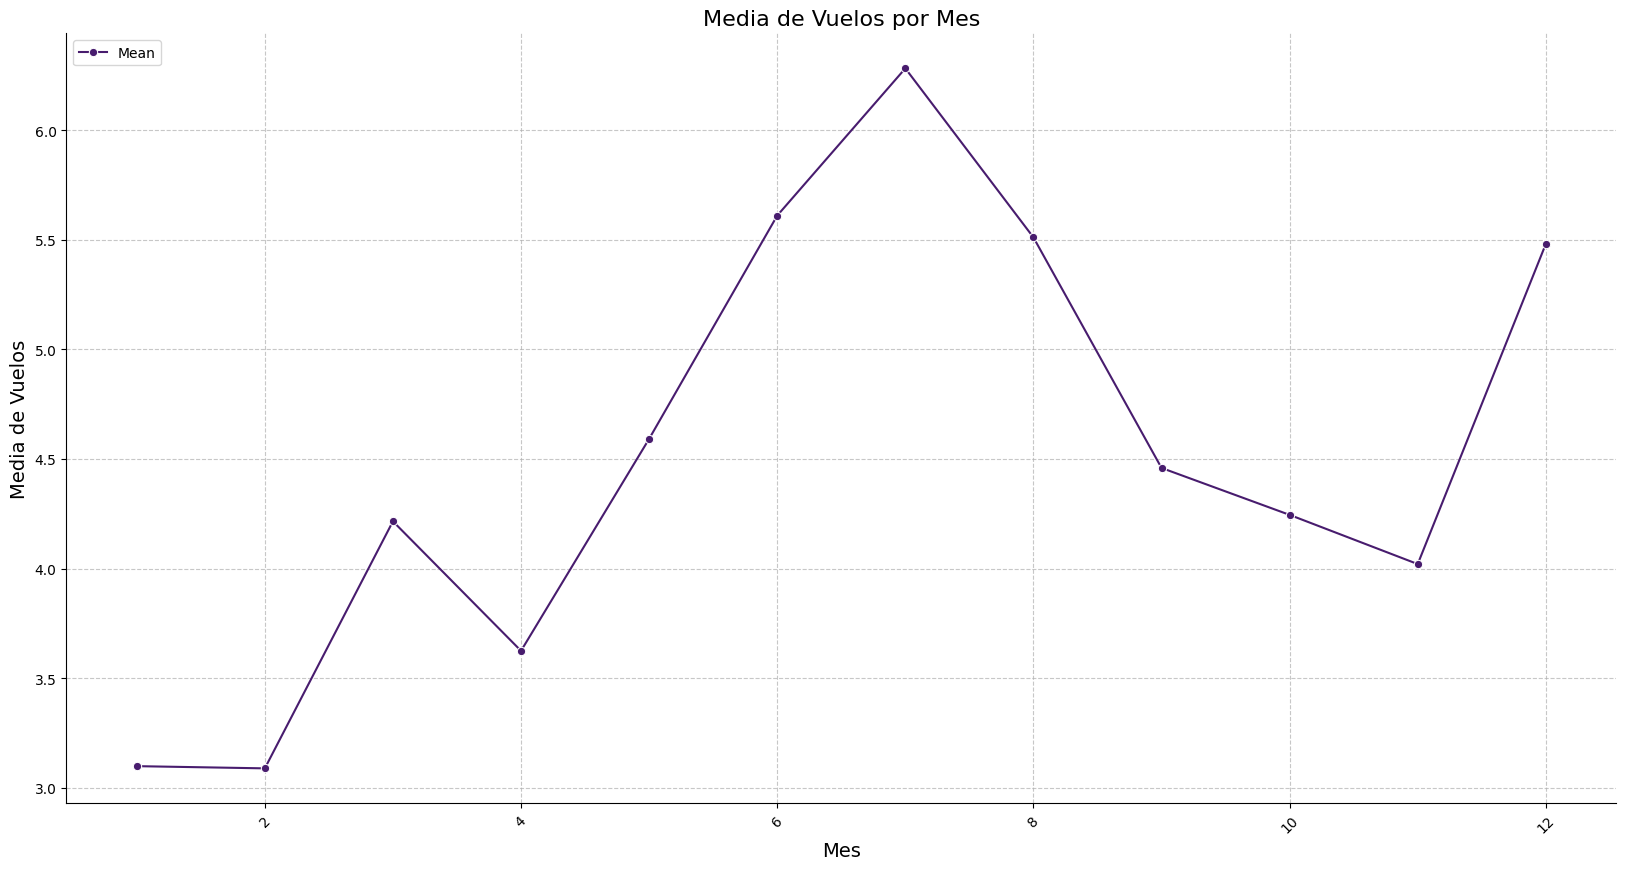

In [44]:
colores=sns.color_palette("viridis", n_colors=len(media_vuelos_mes))
plt.figure(figsize=(20,10))
sns.lineplot(data=media_vuelos_mes, x="Month", y="Flights Booked", color=colores[0], marker='o', label='Mean')
plt.title('Media de Vuelos por Mes', fontsize=16) #Titulo del gráfico
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Media de Vuelos', fontsize=14)
plt.xticks(rotation=45)#rotación de los valores en x
plt.grid(True, linestyle='--', alpha=0.7)#cuadricula
plt.legend(loc='upper left')
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

- Las reservas historicamente crecen en marzo, mayo, junio y julio teniendo en este último el pico anual. A partir de este mes decrece y vuelve a aumenta a partir de noviembre y diciembre. 
- Los picos corresponden con epocas vacacionales: Semana Santa (si la hay en Canadá), verano (si lo hay en Canadá) y Navidad (que seguro que hay). 
- Los meses en los que hay menos reservas son en enero y febrero seguido de abril. 

¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [45]:
df_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521.0,152.0,0,0.0,92552.0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0,0.0,77288.0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200.0,120.0,0,0.0,53304.0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,63253.0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,91163.0


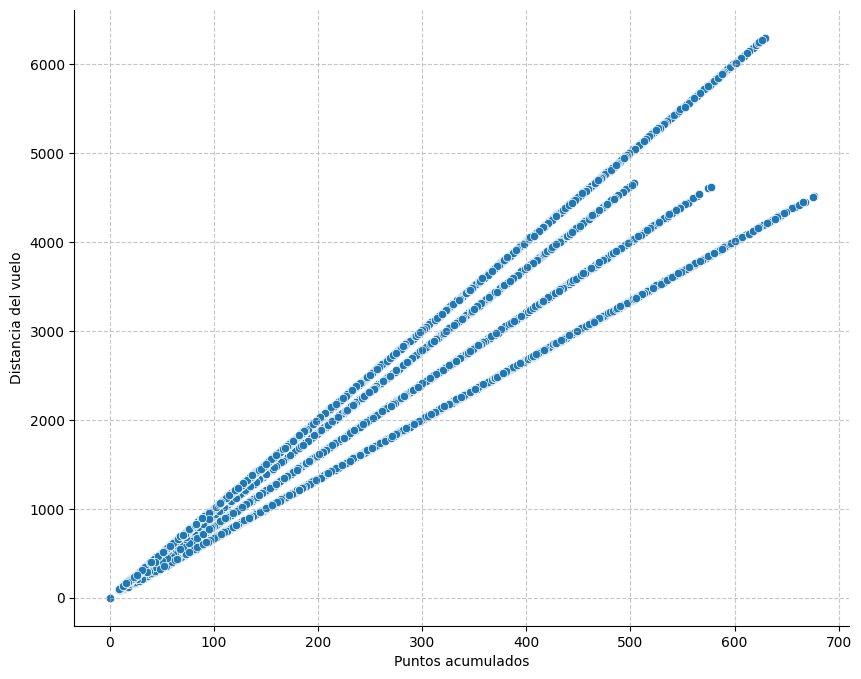

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = "Points Accumulated", 
                y = "Distance", 
                data = df_copy)

# cambiamos los nombres de los ejes
plt.xlabel("Puntos acumulados")
plt.ylabel("Distancia del vuelo")
plt.grid(True, linestyle='--', alpha=0.7)#cuadricula
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

- Existe una clara relación: mayor distancia, mayor cantidad de puntos y viceversa. 

¿Cuál es la distribución de los clientes por provincia o estado?

In [47]:
df_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521.0,152.0,0,0.0,92552.0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0,0.0,77288.0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200.0,120.0,0,0.0,53304.0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,63253.0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,91163.0


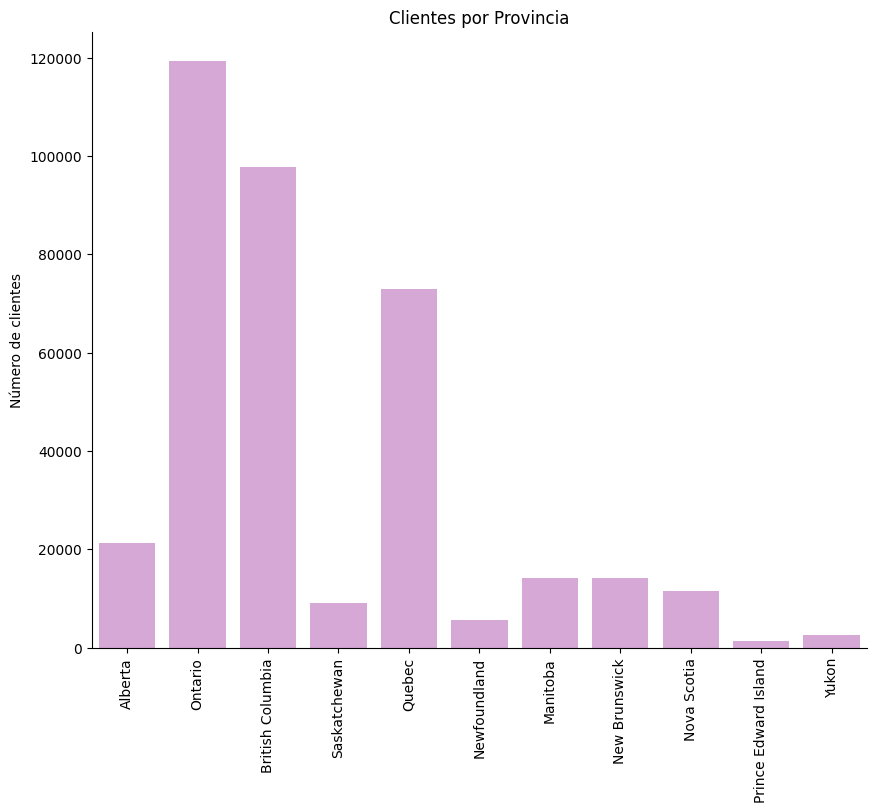

In [48]:
#Usamos countplot al tratarse de frecuencias de una columna categórica

fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(x="Province", data=df_copy, color="plum")
plt.title("Clientes por Provincia")
plt.xlabel("")
plt.ylabel("Número de clientes")
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;
plt.xticks(rotation = 90);  # Rotamos etiquetas del eje x


- La mayor parte de los clientes viven en Ontario, British Columbia y Quebec. 
- La menor cantidad de clientes se encuentra en Yukon y Prince Edward Island

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

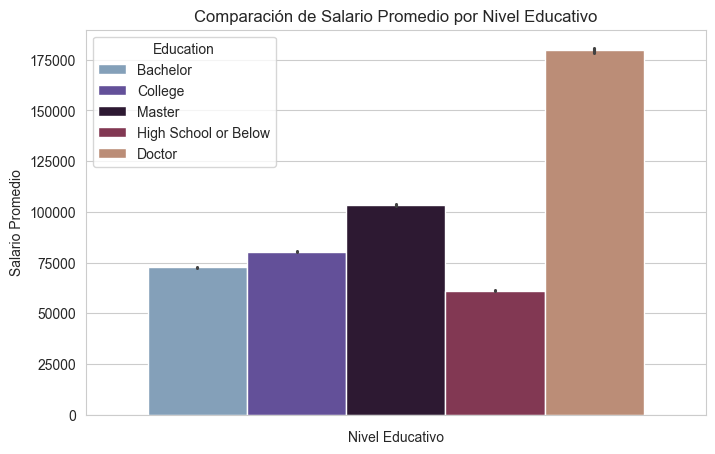

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(y='Salary',hue='Education', data=df_copy, palette='twilight')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación de Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45) 
plt.show(); 

- Los doctorados son los que mayor sueldo tienen
- Los que menos cobran son los que menor nivel de estudios tienen. 
- Los diplomados y licenciados están igualados, siendo los diplomados los que más cobran de los dos grupos. 
- Los clientes con máster son los segundo que mejor sueldo y bastante mejor que los diplomados. 

¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [51]:
df_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521.0,152.0,0,0.0,92552.0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0,0.0,77288.0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200.0,120.0,0,0.0,53304.0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,63253.0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,91163.0


In [84]:
# Agrupo por Loyalty Card y cuento el número de personas a través de la columna Loyalty number que es valor unico por cliente, una especie de ID.
frecuencia_relativa = df_copy.groupby(['Loyalty Card'])['Loyalty Number'].count().reset_index()
frecuencia_relativa

,Loyalty Card,Loyalty Number
0,Aurora,75815
1,Nova,125177
2,Star,168780


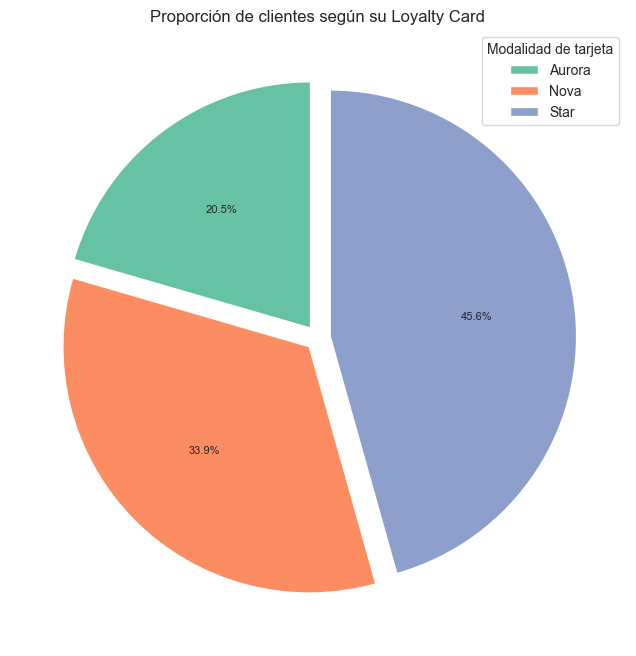

In [55]:
sns.set_style("whitegrid") 
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie('Loyalty Number', labels=None,
        data = frecuencia_relativa, 
        autopct=  '%1.1f%%', 
        colors=sns.color_palette('Set2'),
        explode=[0.05, 0.05, 0.05],
        textprops={'fontsize': 8}, 
        startangle=90),
plt.title('Proporción de clientes según su Loyalty Card')
plt.legend(frecuencia_relativa['Loyalty Card'], title='Modalidad de tarjeta');

- La mayoría de los clientes tienen tarjeta Star. 
- La tarjeta Aurora es la menos popular de las 3. 

¿Cómo se distribuyen los clientes según su estado civil y género?

In [88]:
conteo_clientes = df_copy.groupby(['Gender', 'Marital Status'])['Loyalty Number'].nunique().reset_index()
conteo_clientes

,Gender,Marital Status,Loyalty Number
0,Female,Divorced,1196
1,Female,Married,4575
2,Female,Single,2153
3,Male,Divorced,1196
4,Male,Married,4598
5,Male,Single,2103


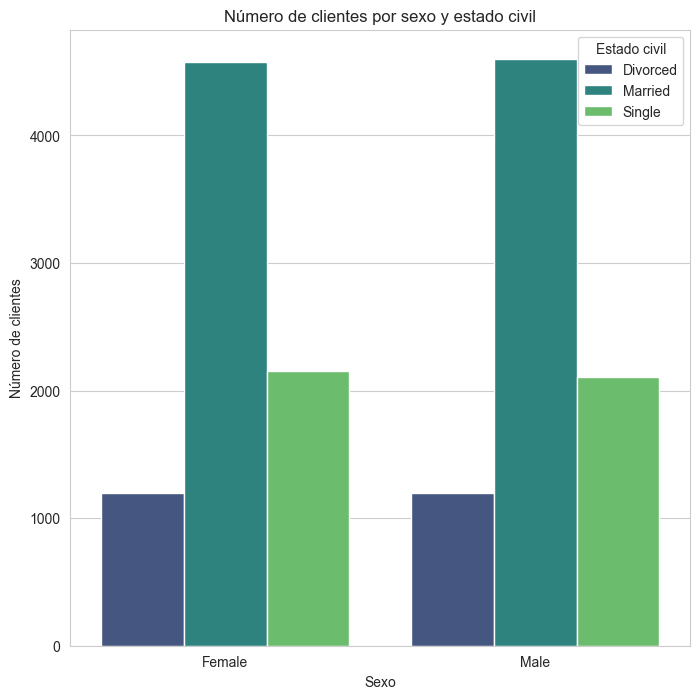

In [87]:
#Propongo un grafico de barras que me permite incluir conteo y una categórica. 
# Además puedo agregar una dimensión adicional a la visualización al diferenciar las barras por un factor categórico adicional, en este caso el estado civil.
plt.figure(figsize=(8, 8))
sns.barplot(x='Gender', y='Loyalty Number', hue='Marital Status', data=conteo_clientes, palette='viridis')
plt.xlabel('Sexo')
plt.ylabel('Número de clientes')
plt.title('Número de clientes por sexo y estado civil')
plt.legend(title='Estado civil');


- Existe la misma proporción hombres que mujeres. 
- Hay más clientes casados/as que en cualquier otro estado civil. 
- Los divorciado/as son el perfil menos numeroso.

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

- Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:


- Preparación de Datos:
    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [ ]:
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy import stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, t, levene, bartlett, chi2_contingency



# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521.0,152.0,0,0.0,92552.0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0,0.0,77288.0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200.0,120.0,0,0.0,53304.0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,63253.0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0.0,0.0,0,0.0,91163.0


In [ ]:
subset=df_copy[['Flights Booked', 'Education']]
subset.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


- Análisis Descriptivo:
    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [ ]:
educacion_superior=(subset['Education'].isin(['Bachelor', 'Master', 'Doctor']))
educacion_basica=(subset['Education'].isin(['College', 'High School or Below']))

In [ ]:
#Creo la columna basándome en la condición anterior, en el grupo de educación básica hay que poner por obligación un segundo parámetro por si alguno no cumpliera ninguna de las condiciones. 
#Seguro que puede evitarse de alguna manera, next step.
subset['Grupo'] = np.where(educacion_superior, 'Superior', np.where(educacion_basica, 'Básica', 'No aplica'))
subset.sample(4)

,Flights Booked,Education,Grupo
146122,4,College,Básica
271920,12,Bachelor,Superior
151989,5,Bachelor,Superior
43049,2,Bachelor,Superior


In [ ]:
subset.groupby('Grupo')['Flights Booked'].describe()

,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
Básica,110980.0,4.553893,5.319021,0.0,0.0,2.0,9.0,21.0
Superior,258792.0,4.496943,5.300176,0.0,0.0,2.0,8.0,21.0


Medias, medianas y desviación estándar son muy parecidas. Destaca unicamente el Q3 con un punto por encima en el caso del grupo de educación básica. 

- Prueba Estadística:
    - Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
#FORMULACIÓN DE HIPOTESIS
# Hipotesis nula= No hay diferencia significativa en el número de vuelos entre los dos niveles educativos (superior y básico) 
# Hipotesis alternativa= Hay diferencia significativa en el número de vuelos entre los dos niveles educativos (superior y básico) 

#Control: Educación Superior. 
#Test: Educación Básica.



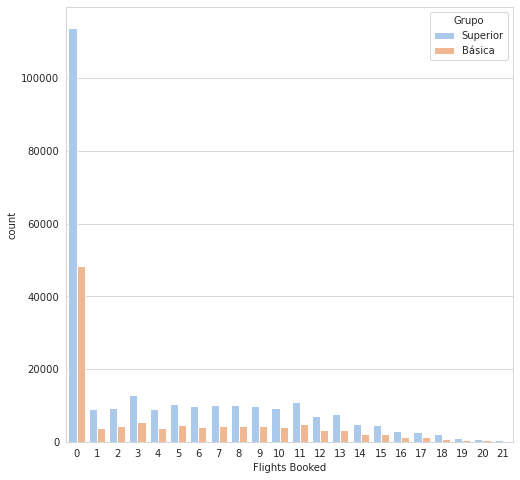

In [ ]:
#Comparación visual. Usamos un histograma para ver la distribución de los vuelos por nivel educativo.
plt.figure(figsize=(8, 8))
sns.countplot( x="Flights Booked", hue="Grupo",data=subset, palette="pastel");

Parece que los clientes con educación superior reservan más vuelos. De todos modos vamos a comprobar mediante el test de Kolmogorov si es así o no. 

In [ ]:
#PRUEBA DE NORMALIDAD
#Usamos Kolmogorov porque la muestra es bastante grande. 

def normalidad(dataframe, columna):

    statistic, p_value = kstest(dataframe[columna], 'norm')
    
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")
        
normalidad(subset, 'Flights Booked')

Para la columna Flights Booked los datos no siguen una distribución normal.


Como no sigue una distribución normal vamos a acudir a la prueba de hipótesis de Man Whitney

In [ ]:

# Filtro para tener los datos del grupo de educación basica
basico_test= subset[subset['Grupo'] == 'Básica']
basico_test.head()
# Filtro para tener los datos del grupo de educación superior
superior_control= subset[subset['Grupo'] == 'Superior']


In [ ]:
u_statistic, p_value = stats.mannwhitneyu(superior_control['Flights Booked'], basico_test['Flights Booked'])

if p_value < 0.05:
    print(f"Para la métrica Flights Booked el p_value es {p_value}, las medianas son diferentes.")
else:
    print(f"Para la métrica Flights Booked el p_value es {p_value}, las medianas son iguales.")

Para la métrica Flights Booked el p_value es 0.0019815714879503946, las medianas son diferentes.


Conclusión: 
- Podemos rechazar la hipotesis nula (el nivel de estudios no está relacionado con la cantidad de vuelos reservados) y concluir que el nivel de estudios afecta a la cantidad de reservas de vuelos